<a href="https://colab.research.google.com/github/ceyxasm/implementations/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [25]:
#data read
#dataset- https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/IPL Matches 2008-2020.csv')
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [26]:
team1=np.array(data.iloc[:,6])
team2=np.array(data.iloc[:,7])
team=[]
for i in team1:
  if i not in team:
    team.append(i)
    print(i)

#all these teams have however not been part of all the seasons
#teams that have been part of all the seasons are:
#Royal Challengers Bangalore
#Kings XI Punjab
#Mumbai Indians
#Kolkata Knight Riders
#Rajasthan Royals
#Chennai Super Kings
####>>>>  https://www.quora.com/Is-there-any-IPL-player-who-played-in-all-season-from-the-same-team
#to make our analysis more uniform, we will be limiting ourself to these teams only and dropping the remaining
##LETS HOPE THIS DOESNOT CONTRIBUTE TO SAMPLING BAIS



Royal Challengers Bangalore
Kings XI Punjab
Delhi Daredevils
Mumbai Indians
Kolkata Knight Riders
Rajasthan Royals
Deccan Chargers
Chennai Super Kings
Kochi Tuskers Kerala
Pune Warriors
Sunrisers Hyderabad
Gujarat Lions
Rising Pune Supergiants
Rising Pune Supergiant
Delhi Capitals


In [27]:
#data preprocessing
row=data.shape[0]
drop_label=[]
drop_team=[ "Kochi Tuskers Kerala", "Pune Warriors",  "Gujarat Lions",
            "Rising Pune Supergiants", "Rising Pune Supergiant"   ]

for i in drop_team:
  data = data.loc[data["team1"] != i]
  data=  data.loc[data["team2"] != i]
print("data points before dropping: "+str(row)+"\ndata points after dropping: "+str(data.shape[0]))

data=data.replace({"Deccan Chargers":"Sunrisers Hyderabad","Delhi Capitals": "Delhi Daredevils" })
#"Deccan Chargers"--->"Sunrisers Hyderabad"
#"Delhi Capitals"----> "Delhi Daredevils"



data points before dropping: 816
data points after dropping: 701


In [28]:
team1=np.array(data.iloc[:,6])
team2=np.array(data.iloc[:,7])
winner=np.array(data.iloc[:,10])
n_matches=len(team1)

team=[]
for i in range(len(team1)):
  if team1[i] not in team:
    team.append(team2[i])
  if team2[i] not in team:
    team.append(team2[i])

    
team_code=[]
for i in team:
  x=i.split()
  code=""
  for j in x:
    code+=j[0]
  team_code.append(code)
  print(code+" "+i+"\n")



KKR Kolkata Knight Riders

CSK Chennai Super Kings

RR Rajasthan Royals

RCB Royal Challengers Bangalore

SH Sunrisers Hyderabad

KXP Kings XI Punjab

DD Delhi Daredevils

MI Mumbai Indians



In [29]:
for i in range(n_matches):
  for j in range(len(team)):
    if team1[i]==team[j]: team1[i]=team_code[j]
    if team2[i]==team[j]: team2[i]=team_code[j]
    if winner[i]==team[j]: winner[i]=team_code[j]

team=team_code

KKR {'wins': 91, 'loss': 86, 'matches': 177, 'cups': 2, 'turnout': 0.5141242937853108}
CSK {'wins': 101, 'loss': 69, 'matches': 170, 'cups': 3, 'turnout': 0.5941176470588235}
RR {'wins': 76, 'loss': 78, 'matches': 154, 'cups': 1, 'turnout': 0.4935064935064935}
RCB {'wins': 79, 'loss': 100, 'matches': 179, 'cups': 0, 'turnout': 0.441340782122905}
SH {'wins': 83, 'loss': 100, 'matches': 183, 'cups': 1, 'turnout': 0.453551912568306}
KXP {'wins': 80, 'loss': 95, 'matches': 175, 'cups': 0, 'turnout': 0.45714285714285713}
DD {'wins': 77, 'loss': 101, 'matches': 178, 'cups': 1, 'turnout': 0.43258426966292135}
MI {'wins': 111, 'loss': 75, 'matches': 186, 'cups': 5, 'turnout': 0.5967741935483871}


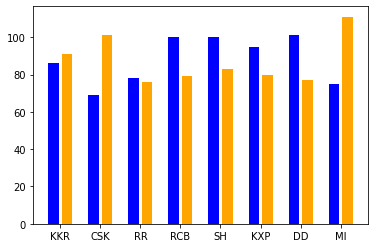

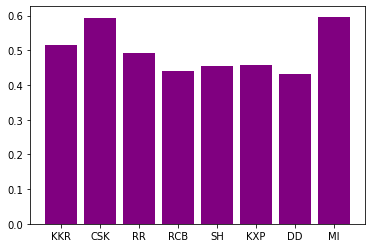

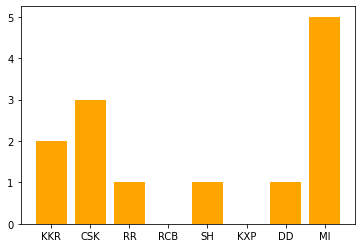

In [30]:
matches={}

for i in range(n_matches):
  if team1[i] not in matches:
    matches[team1[i]]={'wins':0,
                      'loss':0,
                      'matches':1}
  else: matches[team1[i]]['matches']+=1
  if winner[i]==team1[i]:
    matches[team1[i]]['wins']+=1
  else: matches[team1[i]]['loss']+=1

for i in range(n_matches):
  matches[team2[i]]['matches']+=1
  if winner[i]==team2[i]:
    matches[team2[i]]['wins']+=1
  else: matches[team2[i]]['loss']+=1

##adding number of season wins: 0 for RCB 3 for CSK like that
###>>>>>>>>>>>>>data compiled only till 2020 so dropping CSKs 2021 win; maybe u can contribute to the data set
for i in team:
  matches[i]['cups']=0
matches['MI']['cups']=5
matches['CSK']['cups']=3
matches['SH']['cups']=1
matches['RR']['cups']=1
matches['DD']['cups']=1
matches['KKR']['cups']=2

wins=[]
loss=[]
turnout=[]
cups=[]
for i in team_code:
  matches[i]['turnout']=matches[i]['wins']/(matches[i]['loss']+ matches[i]['wins'] )
  wins.append(matches[i]['wins'])
  loss.append(matches[i]['loss'])
  turnout.append(matches[i]['turnout'])
  cups.append(matches[i]['cups'])
  print(i, matches[i])

x_axis=np.arange(len(team))*3
plt.bar(x_axis-0.5, loss, color='blue', label='loss' )
plt.bar(x_axis+0.5, wins, color='orange',label='wins' )
plt.xticks(x_axis, team)
plt.show()

plt.bar(team, turnout, color='purple')
plt.show()
plt.bar(team, cups, color='orange' )
plt.show()

In [31]:
#assume home advantage to be null
# P-values are used to determine whether or not a result is statistically significant

having compiled our dataset and translated meaningful results, lets ask some questions
> Does RCB actually play poorly or are they just unlucky?

> Dependency of a team winning a single game to it winning the season<<<<<<<<<<<

> in IPL 2021, did better team actually win the game?

>what should be the number of matches in a season to make sure better team wins.

In [32]:
#each team on an average plays 10 games before appearing in the final
#considering that it wins finals, and qualifiers and semis; it has to play 7 matches to appear in the quali 
#to appear in the quali, it has to win atleast 4 matches out of 7
def seasonresult(match_count, win_prob):
  win_count=0
  for i in range(match_count):
    if random.random() <= win_prob:
      win_count+=1
  return (win_count > (match_count)/2)



In [64]:
def simulate_season( count):
  p=0.5
  probs=[]
  season_win=[]
  while(p<=1):
    win=0
    for i in range(count):
      if seasonresult(7, p):
        win+=1
    probs.append(p)
    season_win.append(win/count)
    p+=0.01

  for i in range(len(probs)):
    if season_win[i]>=0.9:
      ideal_prob=probs[i]
      break

  plt.plot(probs, season_win)
  plt.axhline(y = 0.90, color = 'r', linestyle = '-')
  plt.axvline(x = ideal_prob, color = 'black', linestyle = '-')
  plt.xlabel('probability of winning a match')
  plt.ylabel('probability of winning the season')
  plt.show()
  print("therefore for a team to win the season 90% times, its probability of winning a single match should be:  "+ str(ideal_prob))
  


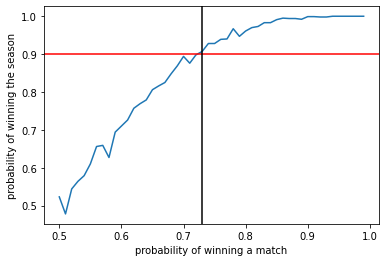

therefore for a team to win the season 90% times, its probability of winning a single match should be:  0.7300000000000002


In [65]:
simulate_season(1000)

In [58]:
##no team si far has given such a consistency. yet we have teams that perform very good in terms of season wins ir MI and some perform poorly like  RCB
## safe to say we do have some element of luck

In [59]:
#Suppose we assume that these winning percentages are accurate reflections of 
#the relative strengths of these two teams

In [69]:
#did better team win in 2021 IPL and what not bs
#are 12 matches inuf to determine better team

csk_win_rate=matches['CSK']['turnout']
kkr_win_rate=matches['KKR']['turnout']

won=0
simulation_count=1000
for i in range(simulation_count):
  if seasonresult(12, csk_winrate/(csk_winrate+ kkr_win_rate)):
    won+=1

won_frac=won/simulation_count
print('therefore when we had season in which each team plays 12 match, probability that CSK will win the season is: '+ str(won_frac))
print('clearly our confidence that better team won the title is pretty low')

therefore when we had season in which each team plays 12 match, probability that CSK will win the season is: 0.492
clearly our confidence that better team won the title is pretty low


In [78]:
def frac_lost(win_prob, simulation_count, n_matches):
  won=0
  for i in range(simulation_count):
    if seasonresult(n_matches, win_prob):
      won+=1
  return (simulation_count - won)/simulation_count

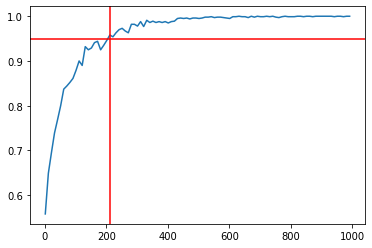

211


In [85]:
##we can clearly say that 60 matches per season is a small number to make sure that better team wins
##then how many matches should we conduct to make sure that bettter team wins??
##or lets answer another intresting question
##RCB performs poorly but is it bcz they are unlucky or just that they play bad??
##lets as an RBC supported assume that RCB is unlucky; H0
##minimum number of matches to make sure that RCB plays bad and not unlucky
rcb_win=matches['RCB']['turnout']
def find_count(team_prob):
  simulation_count=1000 #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
  mx_count=1000
  step=10
  count=[]
  loss_frac=[]

  for i in range(1, mx_count, step):
    count.append(i)
    loss_frac.append(frac_lost( team_prob, simulation_count, i) )

  match_number=0
  for i in range(len(count)):
    if loss_frac[i]>=0.95:
      match_number=count[i]
      break


  plt.plot(count, loss_frac)
  plt.axhline(y = 0.95, color = 'r', linestyle = '-')
  plt.axvline(x = match_number , color = 'r', linestyle = '-')
  plt.show()
  print(match_number)

find_count(rcb_win)
#print(rcb_win)

  